# 1.讀取檔案
    檔案內容中有中文字時，可以使用這些常用的編碼(encoding的參數)來開啟或儲存:
    ansi ,utf-8-sig ,Big5 


## 讀取txt

In [1]:
with open('input/readme.txt','r',encoding='utf-8-sig') as f:
    txt = f.read()
print(txt)

第一行
第二行


In [116]:
with open('input/新北_2019-01-03_交簡_4137.txt','r',encoding = 'utf-8-sig') as f:
    txt = f.read()
print('犯刑法第185條之3第1項第1款駕駛動力交通工具' in txt)
#想要抓取文檔中的特定詞時，會為了避免錯誤而將空格、換行符號等等取代掉
txt = txt.replace('\n','').replace('\u3000','').replace(' ','')
print('犯刑法第185條之3第1項第1款駕駛動力交通工具' in txt)

False
True


In [124]:
#如果只需要附錄以上的內容時:
print('我們不要的附錄內容如下:\n' ,txt.split('書記官')[-1])
#剩下的 txt.split('書記官')[:-1] 因為type是list不是string，可用join這函數合成string
txt2 = '書記官'.join( txt.split('書記官')[:-1])

我們不要的附錄內容如下:
 蕭玫綺附錄本案所犯法條全文：中華民國刑法第185條之3駕駛動力交通工具而有下列情形之一者，處2年以下有期徒刑，得併科20萬元以下罰金：一、吐氣所含酒精濃度達每公升零點二五毫克或血液中酒精濃度達百分之零點零五以上。二、有前款以外之其他情事足認服用酒類或其他相類之物，致不能安全駕駛。三、服用毒品、麻醉藥品或其他相類之物，致不能安全駕駛。因而致人於死者，處3年以上10年以下有期徒刑；致重傷者，處1年以上7年以下有期徒刑。本件係依刑事訴訟法簡易程序辦理，法院簡易庭得不傳喚被告、輔佐人、告訴人、告發人等出庭即以簡易判決處刑；被告、被害人、告訴人等對於告訴乃論案件如已達成民事和解而要撤回告訴或對非告訴乃論案件認有受傳喚到庭陳述意見之必要時，請即另以書狀向臺灣新北地方法院簡易法庭陳述或請求傳訊。


In [128]:
#join的範例
li = ['今天是','月','日']
'10'.join(li)

'今天是10月10日'

## 讀取csv
### test.csv 資料示意圖
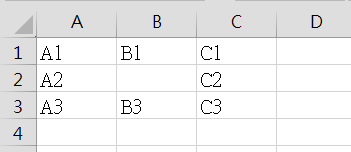

In [155]:
#法一
with open('input/test.csv','r') as f:
    string = f.read()
lines = string.splitlines() #也等同 lines = string.split('\n')[:-1] ,因string.split('\n')[-1] = ''
table = []
print('lines資料如下')
for it,line in enumerate(lines):
    print('第{i}列資料為 \'{l}\''.format(i=it+1,l=line) )
    table.append( line.split(',') )

#換個不好的寫法(不易讀)
with open('input/test.csv','r') as f:
    table = [ row.split(',') for row in [line for line in f.read().splitlines()] ]
print('table=',table)

lines資料如下
第1列資料為 'A1,B1,C1'
第2列資料為 'A2,,C2'
第3列資料為 'A3,B3,C3'
table= [['A1', 'B1', 'C1'], ['A2', '', 'C2'], ['A3', 'B3', 'C3']]


In [1]:
#法二
import csv
with open('input/test.csv') as f:
    table = [row for row in csv.reader(f,delimiter=',')]

#換個寫法
table = []
with open('input/test.csv') as f:
    for row in csv.reader(f,delimiter=','):
        table.append(row)
print('table=',table)

print('表格第2列第3欄的元素為{}'.format(table[1][2]) )

table= [['A1', 'B1', 'C1'], ['A2', '', 'C2'], ['A3', 'B3', 'C3']]
表格第2列第3欄的元素為C2


### 常見的pandas DataFrame

In [134]:
import pandas as pd
#開啟csv檔
df = pd.read_csv('2019_0102.csv',encoding='ansi')
#開啟excel檔
df = pd.read_excel('2019_0102.xlsx')
df

,index,court,date,法官,判刑月數,酒精濃度,紀錄再犯,累犯次數,total_crime_nums,week,...,taipei,taitung,taoyuan,yilan,yunlin,大型車,小客車,電動自行車,機車,貨車
0,南投_2019-01-02_投交簡_576.txt,nantou,2019-01-02,孫于淦,2,1.075,0,0.0,1,1,...,0,0,0,0,0,0,0,0,1,0
1,南投_2019-01-07_埔交簡_2.txt,nantou,2019-01-07,孫于淦,3,0.540,0,0.0,1,2,...,0,0,0,0,0,0,0,0,0,1
2,南投_2019-01-07_投交簡_521.txt,nantou,2019-01-07,楊國煜,2,0.290,0,0.0,1,2,...,0,0,0,0,0,0,1,0,0,0
3,南投_2019-01-07_投交簡_524.txt,nantou,2019-01-07,孫于淦,5,0.250,1,NaN,2,2,...,0,0,0,0,0,0,0,0,1,0
4,南投_2019-01-07_投交簡_531.txt,nantou,2019-01-07,黃俊明,5,0.430,1,2.0,3,2,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3284,雲林_2019-02-27_港交簡_45.txt,yunlin,2019-02-27,蕭于哲,3,0.670,0,0.0,1,9,...,0,0,0,0,1,0,1,0,0,0
3285,雲林_2019-02-27_港交簡_50.txt,yunlin,2019-02-27,許佩如,2,0.370,0,0.0,1,9,...,0,0,0,0,1,0,0,0,1,0
3286,雲林_2019-02-27_虎交簡_18.txt,yunlin,2019-02-27,黃偉銘,2,0.500,0,0.0,1,9,...,0,0,0,0,1,0,0,0,0,1
3287,雲林_2019-02-27_虎交簡_35.txt,yunlin,2019-02-27,陳碧玉,5,1.180,0,0.0,1,9,...,0,0,0,0,1,0,0,0,1,0


# 2.寫入檔案

## 寫入txt

In [164]:
lines = ['第一行','第二行','第三行']
txt = '\n'.join(lines)
print(txt)
with open('output/test.txt','w') as f:
    f.write(txt)

第一行
第二行
第三行


## 寫入csv

In [153]:
import csv
column = ['名字','數學成績','英文成績']
rows = [['甲',10,20],['乙',30,40],['丙',50,60]]
with open('output/score.csv','w',newline='') as f:
    #沒用 newline='' 的話每寫一列就會自動再新增一列空白
    w = csv.writer(f)
    w.writerow(column)
    w.writerows(rows)

In [169]:
import pandas as pd
#法一:橫向併入
column = ['名字','數學成績','英文成績']
rows = [['甲',10,20],['乙',30,40],['丙',50,60]]
df = pd.DataFrame(data = rows,columns=column)
#法二:縱向併入
df = pd.DataFrame(data = {'名字':['甲','乙','丙'],'數學成績':[10,30,50],'英文成績':[20,40,60] })

df.head() #顯示前5筆內資料

#儲存csv
df.to_csv('output/score1.csv',encoding='utf-8-sig',index=False)
#不用中文的編碼寫入後，用excel開啟csv檔時會顯示亂碼
df.to_csv('output/score2.csv',index=False)
#儲存excel
df.to_excel('output/score.xlsx',index=False )